In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('C:\\Users\\KARTHIKAMATH\\Documents\\zomato.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [4]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
626,False,False,False,False,False,False,False
627,False,False,False,False,False,False,False
628,False,False,False,False,False,False,False
629,False,False,False,False,False,False,False


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


In [6]:
data.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0    2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1    2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2    2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3    2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4    2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   
..          ...         ...         ...         ...         ...         ...   
626  2024-02-01  141.000000  143.500000  138.550003  140.550003  140.550003   
627  2024-02-02  141.800003  145.000000  141.449997  143.800003  143.800003   
628  2024-02-05  145.000000  145.399994  138.250000  140.250000  140.250000   
629  2024-02-06  140.399994  141.800003  138.050003  139.949997  139.949997   
630  2024-02-07  141.000000  142.899994  139.649994  140.399994  140.399994   

        Volume  
0 

In [9]:
data['50_day_ma'] = data['Close'].rolling(window=50).mean()


In [10]:

data['Price Change'] = data['Close'].diff()
lookback_period = 14

data['Gain'] = data['Price Change'].apply(lambda x: x if x > 0 else 0)
data['Loss'] = data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
data['Average Gain'] = data['Gain'].rolling(window=lookback_period).mean()
data['Average Loss'] = data['Loss'].rolling(window=lookback_period).mean()

data['RS'] = data['Average Gain'] / data['Average Loss']

data['RSI'] = 100 - (100 / (1 + data['RS']))


In [11]:

print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  50_day_ma  Price Change       Gain      Loss  Average Gain  \
0  694895290        NaN           NaN   0.000000  0.000000           NaN   
1  249723854        NaN     14.649994  14.649994  0.000000           NaN   
2  240341900        NaN     -7.750000   0.000000  7.750000           NaN   
3  159793731        NaN     -1.699997   0.000000  1.699997           NaN   
4  117973089        NaN     10.350006  10.350006  0.000000           NaN   

   Average Loss  RS  RSI  
0           NaN NaN  NaN  
1           NaN NaN  NaN  

In [30]:

data['Average Gain'].fillna(0, inplace=True)
data['Average Loss'].fillna(0, inplace=True)
data['50_day_ma'].fillna(0, inplace=True)
data['RS'].fillna(0, inplace=True)
data['RSI'].fillna(0, inplace=True)
data['Price Change'].fillna(0, inplace=True)

In [31]:
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  50_day_ma  Price Change       Gain      Loss  Average Gain  \
0  694895290        0.0      0.000000   0.000000  0.000000           0.0   
1  249723854        0.0     14.649994  14.649994  0.000000           0.0   
2  240341900        0.0     -7.750000   0.000000  7.750000           0.0   
3  159793731        0.0     -1.699997   0.000000  1.699997           0.0   
4  117973089        0.0     10.350006  10.350006  0.000000           0.0   

   Average Loss   RS  RSI  
0           0.0  0.0  0.0  
1           0.0  0.0  0.

In [47]:
new_data['50_day_ma'] = new_data['Close'].rolling(window=50).mean()


In [48]:

new_data['Price Change'] = new_data['Close'].diff()


lookback_period = 14


new_data['Gain'] = new_data['Price Change'].apply(lambda x: x if x > 0 else 0)
new_data['Loss'] = new_data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
new_data['Average Gain'] = new_data['Gain'].rolling(window=lookback_period).mean()
new_data['Average Loss'] = new_data['Loss'].rolling(window=lookback_period).mean()


new_data['RS'] = new_data['Average Gain'] / new_data['Average Loss']


new_data['RSI'] = 100 - (100 / (1 + new_data['RS']))


In [39]:
X = data[['Open', 'Gain']]  
y = data['Close'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.206922796040623


In [44]:
import pandas as pd


new_data = pd.read_csv('C:/Users/KARTHIKAMATH/Downloads/zomato.csv')


new_data.head()





,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [ ]:
new_data['50_day_ma'] = new_data['Close'].rolling(window=50).mean()

In [ ]:

new_data['Price Change'] = new_data['Close'].diff()

lookback_period = 14


new_data['Gain'] = new_data['Price Change'].apply(lambda x: x if x > 0 else 0)
new_data['Loss'] = new_data['Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
new_data['Average Gain'] = new_data['Gain'].rolling(window=lookback_period).mean()
new_data['Average Loss'] = new_data['Loss'].rolling(window=lookback_period).mean()


new_data['RS'] = new_data['Average Gain'] / new_data['Average Loss']

new_data['RSI'] = 100 - (100 / (1 + new_data['RS']))


In [49]:
new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_day_ma,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,NaN,14.649994,14.649994,0.000000,NaN,NaN,NaN,NaN
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,NaN,-7.750000,0.000000,7.750000,NaN,NaN,NaN,NaN
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,NaN,-1.699997,0.000000,1.699997,NaN,NaN,NaN,NaN
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,NaN,10.350006,10.350006,0.000000,NaN,NaN,NaN,NaN


In [50]:

new_data['Average Gain'].fillna(0, inplace=True)
new_data['Average Loss'].fillna(0, inplace=True)
new_data['50_day_ma'].fillna(0, inplace=True)
new_data['RS'].fillna(0, inplace=True)
new_data['RSI'].fillna(0, inplace=True)
new_data['Price Change'].fillna(0, inplace=True)

In [51]:
new_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,50_day_ma,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,0.0,14.649994,14.649994,0.000000,0.0,0.0,0.0,0.0
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,0.0,-7.750000,0.000000,7.750000,0.0,0.0,0.0,0.0
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,0.0,-1.699997,0.000000,1.699997,0.0,0.0,0.0,0.0
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,0.0,10.350006,10.350006,0.000000,0.0,0.0,0.0,0.0


In [52]:

X_new = new_data[['Open', 'Gain']] 


predictions = model.predict(X_new)


print("Predicted Closing Prices for Future Dates:")
print(predictions)

Predicted Closing Prices for Future Dates:
[114.08136062 140.56763423 139.34961691 128.82937185 144.2358922
 140.23450643 140.40216305 134.72857634 137.48154139 136.44917765
 133.25377522 130.205847   128.82937185 132.59796829 133.40124943
 133.74682004 134.13864999 130.59913615 134.99820789 137.55596544
 135.51513989 125.14236904 123.9133681  124.95727912 124.50328659
 135.58518617 132.89229522 132.31973746 135.37917823 147.22305761
 146.77278551 142.49585636 139.99736135 139.44432281 142.59921541
 143.79932497 140.57861785 140.62778083 140.18534344 135.41681391
 134.92521354 133.15544924 138.05984099 135.2693397  145.37962166
 141.51265561 135.71177709 136.89161504 136.58218241 138.01796373
 136.44917765 136.44917765 136.8764266  135.71177709 135.99951486
 135.02353951 134.97437653 133.64704962 143.82093513 142.49585636
 136.20337746 137.71070868 136.64581485 135.71177709 133.85740644
 133.94201279 133.99696125 132.76217484 132.61034291 130.50081017
 130.69744737 131.18613448 130.746

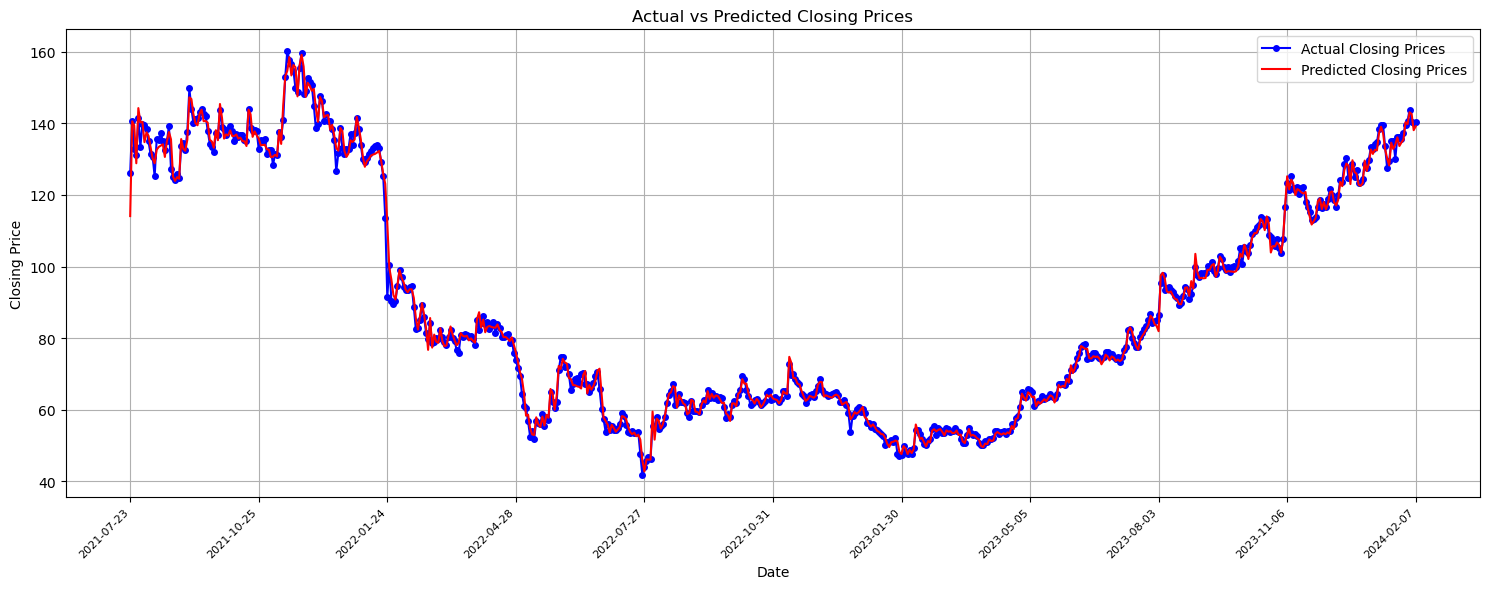

In [73]:
plt.figure(figsize=(15, 6))  # Increase figure size

plt.plot(data['Date'], data['Close'], label='Actual Closing Prices', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(new_data['Date'], predictions, label='Predicted Closing Prices', color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')

plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate, align, and reduce font size of date labels

num_dates = len(data['Date'])
step = max(num_dates // 10, 1)  # Display approximately 10 date labels
plt.xticks(data['Date'][::step])

plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
